<a href="https://colab.research.google.com/github/rwack2019/BDColab/blob/master/week3_data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Colab Week 3: Data Collection

In the past two weeks, we've looked at python and computational thinking as well as manipulating and displaying data using pandas and matplotlib. This week we'll focus on how to collect data.

In real life, data doesn't come pre-packaged in a pandas dataframe. Instead, we have to go collect and clean it from some source. This week we'll look at two ways to collect data: web scraping and APIs.

# Web Scraping
Web scraping is the process of collecting information or data from sites on the internet. And yes, copying and pasting a quote or picture from a website is technically web scraping, we're concerned with automating this process to deal with large volumes of data.

## Website Structure:
Websites are built and rendered using [HTML](https://www.w3schools.com/html/) tags (Hypertext markup language). Other helper languages, for example CSS and javascript, may be present on the site, but ultimatley the browser reads the HTML to decide what visuals and text to render. For example, there is are text, image, list, header, and custom tags. 

You can use tools like Chrome's DevTools to inspect (and change) the HTML for any page you visit.

As mentioned earlier, javascript is often used to help generate HTML for sites. Since the vast majority of HTML is generated programatically (and not by hand), patterns often appear in the structure of the page. Developers rely on these patterns in the HTML when web scraping.


## Packages:
### [Requests](https://requests.readthedocs.io/en/master/):

The requests library is "an elegant and simple HTTP library for Python." Much like typing a url into a browswer and getting a webpage response, you can provide a url to requests and recieve the HTML response for that page. 

Below, we'll follow the example of a web scraper for jobs on the site Monster. You'll write code to scrape info about housing prices from Zillow.

In [ ]:
import requests

city='Baltimore'
job='Data-Scientist'
jobs_url = f'https://www.monster.com/jobs/search/?q={job}&where={city}'
jobs_page = requests.get(jobs_url)
jobs_page.content

**3.1)** Below, use requests and the url http://books.toscrape.com/ to get the HTML for books within a fictional store. 


In [ ]:
#### YOUR CODE HERE #######

### [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

You'll notice that the response from the requests library isn't very pretty. You might be able to convert the string response to a dictionary with patience, time, and a lot of loops, but that would be dreadful.

Thankfully, beautifulsoup is a library that does all of that for you. It reads in HTML data, parses it into a custom data structure, and then allows you to do things like iterate over the HTML or search for specific keywords or tags. 

In [ ]:
from bs4 import BeautifulSoup
jobs_soup = BeautifulSoup(jobs_page.content, 'html.parser')

As mentioned earlier, webistes are built from HTML tags. As sites become more complex, they use more custom tags. Its helpful to switch back and forth from Chrome's devtools to determine which html tags contain the data you're looking for. 

In [ ]:
# Getting element that contains data
jobs_results = jobs_soup.find(id="SearchResults")
print(jobs_results.prettify())


<div class="mux-card mux-job-card" id="SearchResults">
 <section class="card-content " data-jobid="220380948" data-postingid="6a2b9680-df31-472e-abfb-3cb0529c7911" onclick="MKImpressionTrackingMouseDownHijack(this, event)">
  <div class="flex-row">
   <div class="mux-company-logo thumbnail">
   </div>
   <div class="summary">
    <header class="card-header">
     <h2 class="title">
      <a data-bypass="true" data-m_impr_a_placement_id="JSR2CW" data-m_impr_j_cid="9008" data-m_impr_j_coc="xadptotalx" data-m_impr_j_jawsid="448808107" data-m_impr_j_jobid="220380948" data-m_impr_j_jpm="1" data-m_impr_j_jpt="1" data-m_impr_j_lat="38.9915" data-m_impr_j_lid="20583" data-m_impr_j_long="-76.5325" data-m_impr_j_occid="11848" data-m_impr_j_p="1" data-m_impr_j_postingid="6a2b9680-df31-472e-abfb-3cb0529c7911" data-m_impr_j_pvc="monster" data-m_impr_s_t="t" data-m_impr_uuid="0de6b102-eaf2-46c6-9743-02b25884d7ff" href="https://job-openings.monster.com/technical-project-manager-annapolis-md-us-expres

**3.2)** Your turn. Find the HTML tag the encapsulates the results of the bookstore using chrome dev tools and extract it into a variable.

In [ ]:
##### YOUR CODE HERE #########



Now we have the HTML tag that contains all of the information we want. Unfortunatley there's still a lot of junk and unnecessary information in the tag. Never fear! Beautifulsoup still makes it easy to remove the information that we need.

In [ ]:
# Gets the HTML for each card object. Still too much info!!!
job_elems = jobs_results.find_all('section', class_='card-content')
for elem in job_elems:
  print(elem, end='\n'*2)

**3.3)** Use beautifulsoup's find_all function to find all the html tags containing the useful data. Create a for loop to iterate over the tags and print them to the screen.

In [ ]:
##### YOUR CODE HERE #########

In [ ]:
# Gets the HTML tags for the desired information.
# Still need to extract the text from the tag.
for elem in job_elems:
    title_elem = elem.find('h2', class_='title')
    company_elem = elem.find('div', class_='company')
    location_elem = elem.find('div', class_='location')
    print(title_elem)
    print(company_elem)
    print(location_elem)
    print()

In [ ]:
for job_elem in job_elems:
    title_elem = job_elem.find('h2', class_='title')
    company_elem = job_elem.find('div', class_='company')
    location_elem = job_elem.find('div', class_='location')
    # Remove this line
    if(None in (title_elem, company_elem, location_elem)):
      continue
    print(title_elem.text.strip())
    print(company_elem.text.strip())
    print(location_elem.text.strip())
    print()

**3.4)** Now that you've pinpointed the imporant tags. Access the important data within those tags using tag.text.strip() or by accessing the the beautifulsoup dictionary.

In [ ]:
###### YOUR CODE HERE #########

Finally, lets create a pandas dataframe from our data. 

In [ ]:
titles_lst = []
company_lst = []
location_lst = []

for job_elem in job_elems:
    title_elem = job_elem.find('h2', class_='title')
    company_elem = job_elem.find('div', class_='company')
    location_elem = job_elem.find('div', class_='location')
    # Remove this line
    if(None in (title_elem, company_elem, location_elem)):
      continue
    titles_lst.append(title_elem.text.strip())
    company_lst.append(company_elem.text.strip())
    location_lst.append(location_elem.text.strip())


d = {'title': titles_lst, 'compay':company_lst, 'location' : location_lst}
df = pd.DataFrame(d)
df.head()

In [ ]:
### YOUR CODE HERE ####

# APIs

An [API](https://www.freecodecamp.org/news/what-is-an-api-in-english-please-b880a3214a82/) is an application programming interface. It allows a user to interact with data or functionality of a software system using simple endpoints. An API endpoint hides all the heavy lifting of the data collection and cleaning or fucntionality. Instead of having to scrape a site for data, we can access the data directly.

## RESTful APIs
A [RESTful](https://searchapparchitecture.techtarget.com/definition/RESTful-API) API is one that allows a user to GET, PUT, POST, or DELETE data. As you'll see below, the endpoints look just like URLs you'd put into the search bar. We'll use the requests library from earlier to query the API

In [ ]:
import requests

r = requests.get('https://disease.sh/v3/covid-19/all?yesterday=true&twoDaysAgo=false&allowNull=true')
r=r.json() # javascript-object-notation
r

{'country': 'USA', 'province': ['mainland'], 'timeline': {'cases': {'1/22/20': 1, '1/23/20': 1, '1/24/20': 2, '1/25/20': 2, '1/26/20': 5, '1/27/20': 5, '1/28/20': 5, '1/29/20': 6, '1/30/20': 6, '1/31/20': 8, '2/1/20': 8, '2/2/20': 8, '2/3/20': 11, '2/4/20': 11, '2/5/20': 11, '2/6/20': 12, '2/7/20': 12, '2/8/20': 12, '2/9/20': 12, '2/10/20': 12, '2/11/20': 13, '2/12/20': 13, '2/13/20': 14, '2/14/20': 14, '2/15/20': 14, '2/16/20': 14, '2/17/20': 14, '2/18/20': 14, '2/19/20': 14, '2/20/20': 14, '2/21/20': 16, '2/22/20': 16, '2/23/20': 16, '2/24/20': 16, '2/25/20': 16, '2/26/20': 16, '2/27/20': 17, '2/28/20': 17, '2/29/20': 25, '3/1/20': 32, '3/2/20': 54, '3/3/20': 74, '3/4/20': 107, '3/5/20': 184, '3/6/20': 237, '3/7/20': 403, '3/8/20': 519, '3/9/20': 589, '3/10/20': 782, '3/11/20': 1145, '3/12/20': 1584, '3/13/20': 2214, '3/14/20': 2971, '3/15/20': 3211, '3/16/20': 4679, '3/17/20': 6513, '3/18/20': 9153, '3/19/20': 13643, '3/20/20': 20007, '3/21/20': 25991, '3/22/20': 34804, '3/23/20': 4

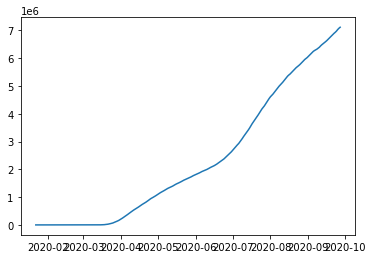

In [ ]:
# What is this code doing?
import matplotlib.pyplot as plt
import pandas as pd

r = requests.get('https://disease.sh/v3/covid-19/historical/usa?lastdays=all')
r = r.json()
print(r)
foo = dict(r['timeline']['cases'])
print(foo)

new_foo = {}
for key, val in foo.items():
  new_foo[pd.to_datetime(key)]= val

plt.plot(list(new_foo.keys()), list(new_foo.values()))

**3.5)** Your turn. Pick an endpoint from disease.sh that returns the NYT's timeseries data for a two different US states. Make a GET request to the API and plot the data for each state.

In [ ]:
#### YOUR CODE HERE ####

# Project

The offline work this weeks involves building a web scraper or using an API to collect data. 

**Web scraper**:
Pick a website that has a simple structure (think lists that contain data like Zillow or Monster). Scrape the site and load the data into a dataframe. Use some of pandas built in tools to do a basic analysis of the data. Finally, use matplotlib to create some visualizations.

http://toscrape.com/

**API**:
Find an API you think is interesting and gather its data using the requests library. It could be a public API or one requiring some sort of auth. Use some of pandas built in tools to do a basic analysis of the data. Finally, use matplotlib to create some visualizations.

https://github.com/public-apis/public-apis

Both of these options require a bit of research to find a suitable API/site. 